# Project: Breast Cancer Prediction

## Introduction

This project uses the Wisconsin Breast Cancer Dataset to predict whether a tumor is malignant (M) or benign (B)
using various machine learning models. The goal is to compare model performance based on accuracy and ROC-AUC scores,
visualized in a bar chart.

## Dataset:
- Source: `breast_cancer.csv` (assumed to be uploaded to Colab)
- Features: 30 numeric features (e.g., radius_mean, texture_mean)
- Target: `diagnosis` (M = Malignant, B = Benign)
- Samples: 569

## Models:
- Logistic Regression (LR)
- Decision Tree (DT)
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- XGBoost
- Random Forest (RF)
- Gradient Boosting Decision Tree (GBDT)

Import necessary libraries for data analysis, modeling, and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

Load and Display Dataset Details

In [2]:
df = pd.read_csv('breast_cancer.csv')

print('Dataset Shape:', df.shape)
print('\nFirst 5 Rows:')
display(df.head())

print('\nUnique Diagnosis Values:', df['diagnosis'].unique())

print('\nSummary Statistics:')
display(df.describe())

Dataset Shape: (569, 32)

First 5 Rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Unique Diagnosis Values: ['M' 'B']

Summary Statistics:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Data Preprocessing

In [7]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Training Set Shape:', X_train.shape)
print('Testing Set Shape:', X_test.shape)

Training Set Shape: (455, 30)
Testing Set Shape: (114, 30)


Model Training and Evaluation

In [4]:
models = [
    {'label': 'LR', 'model': LogisticRegression(random_state=42)},
    {'label': 'DT', 'model': DecisionTreeClassifier(random_state=42)},
    {'label': 'SVM', 'model': SVC(probability=True, random_state=42)},
    {'label': 'KNN', 'model': KNeighborsClassifier()},
    {'label': 'XGBoost', 'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)},
    {'label': 'RF', 'model': RandomForestClassifier(random_state=42)},
    {'label': 'GBDT', 'model': GradientBoostingClassifier(random_state=42)}
]

accuracy_scores = []
roc_scores = []

for m in models:
    model = m['model']
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(round(acc, 2))

    roc_auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100
    roc_scores.append(round(roc_auc, 2))

results = pd.DataFrame({
    'Model': [m['label'] for m in models],
    'Accuracy (%)': accuracy_scores,
    'ROC-AUC (%)': roc_scores
})
print('Model Performance:')
display(results)

Model Performance:


,Model,Accuracy (%),ROC-AUC (%)
0,LR,97.37,99.74
1,DT,94.74,94.40
2,SVM,98.25,99.74
3,KNN,94.74,98.20
4,XGBoost,95.61,99.08
5,RF,96.49,99.53
6,GBDT,95.61,99.51


Visualization

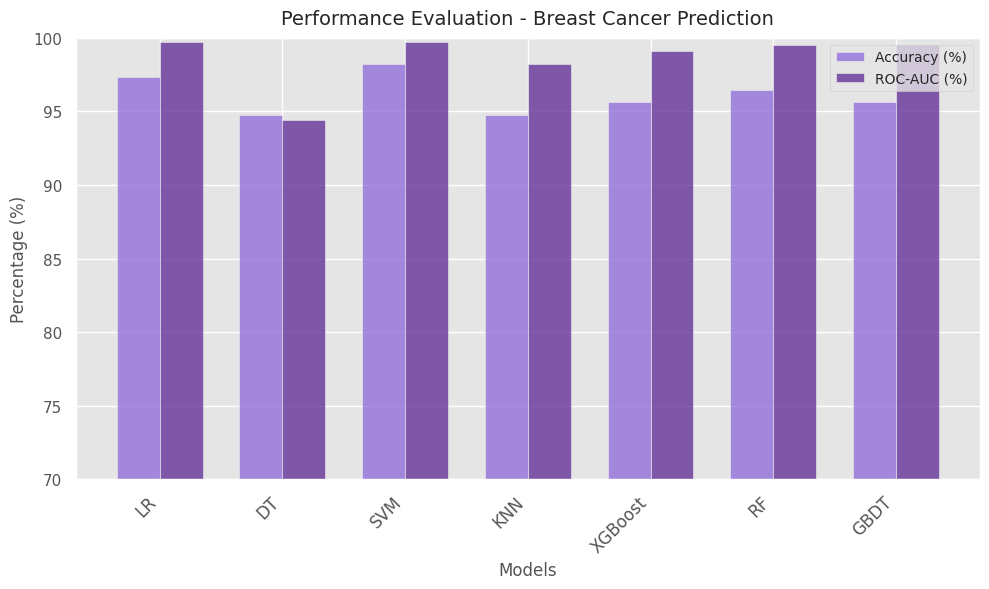

In [5]:
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(index, accuracy_scores, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
rects2 = ax.bar(index + bar_width, roc_scores, bar_width, alpha=opacity, color='rebeccapurple', label='ROC-AUC (%)')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Performance Evaluation - Breast Cancer Prediction', fontsize=14, pad=10)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([m['label'] for m in models], rotation=45, ha='right', fontsize=12)
ax.set_ylim(70, 100)
ax.legend(loc='upper right', fontsize=10)
plt.tight_layout()

plt.savefig('performance_evaluation_breast_cancer.png', format='png', dpi=400, bbox_inches='tight')
plt.show()

# Conclusion
This project successfully trained and evaluated seven machine learning models on the breast cancer dataset.
The results are summarized in a table and visualized in a bar chart, saved as `performance_evaluation_breast_cancer.png`.

Key findings:
- SVM achieved the highest test accuracy (98.25%) and tied with LR for the highest ROC-AUC (99.74%), making it the best overall model for this dataset.
- LR also performed exceptionally well with a test accuracy of 97.37% and an ROC-AUC of 99.74%, offering a simpler alternative to SVM.
- Ensemble methods like RF (96.49% accuracy, 99.53% ROC-AUC) and GBDT (95.61% accuracy, 99.51% ROC-AUC) showed strong performance, indicating their robustness for this task.
- DT and KNN had the lowest accuracies (both 94.74%), with DT also having the lowest ROC-AUC (94.40%), suggesting they may not be the best fit for this dataset without further tuning.
